In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
sys.path.append('/users/mtaranov/LongRange3D/')
from models_binnedFeat import LongRangeDNN
from utils import get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from dragonn.models import Model, SequenceDNN
#from keras.models import Sequential
#from keras.callbacks import Callback, EarlyStopping
#from keras.layers.core import (
#    Activation, Dense, Dropout, Flatten,
#    Permute, Reshape, TimeDistributedDense
#)
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.layers.recurrent import GRU
#from keras.regularizers import l1

#from deeplift import keras_conversion as kc
#from deeplift.blobs import MxtsMode

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 2500 MB, cuDNN 5005)


In [7]:
contacts='PP'
path='/users/mtaranov/datasets_3d/dist_matched_'+contacts+'/'
X_train = get_features(path+'X_train_thres_10.npy')
y_train = get_labels(path+'y_train_thres_10.npy')
X_valid = get_features(path+'X_valid_thres_10.npy')
y_valid = get_labels(path+'y_valid_thres_10.npy')
X_test = get_features(path+'X_test_thres_10.npy')
y_test = get_labels(path+'y_test_thres_10.npy')

In [3]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features(X_train, X_valid, X_test)

#X_train_normalized_subsampled, y_train_subsampled = subsample_data(X_train_normalized, y_train)
#X_valid_normalized_subsampled, y_valid_subsampled = subsample_data(X_valid_normalized, y_valid)
#X_test_normalized_subsampled, y_test_subsampled = subsample_data(X_test_normalized, y_test)

#X_train_scaled_subsampled, y_train_subsampled = subsample_data(X_train_scaled, y_train)
#X_valid_scaled_subsampled, y_valid_subsampled = subsample_data(X_valid_scaled, y_valid)
#X_test_scaled_subsampled, y_test_subsampled = subsample_data(X_test_scaled, y_test)


# without distance

In [4]:
scores_from_10_iter =[]
for i in range(10):
    dnn_normalized = LongRangeDNN(num_features=10, use_deep_CNN=True)
    validation_data = (X_valid_normalized[:, :, :10, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :10, :], y_train, validation_data)
    dnn_normalized.save(contacts+'dnn_CONV_wo_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :10, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :10, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :10, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/'+contacts+'dnn_CONV_wo_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/'+contacts+'dnn_CONV_wo_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :10, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

# pred_probs_test = dnn_normalized.predict(X_test_normalized[:, :, :10, :])
# #np.save("model_predictions/test_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_test)
# pred_probs_valid = dnn_normalized.predict(X_valid_normalized[:, :, :10, :])
# #np.save("model_predictions/valid_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_valid)
# pred_probs_train = dnn_normalized.predict(X_train_normalized[:, :, :10, :])
# #np.save("model_predictions/train_set_upperTriangle_noDiag_reads_with_distances_full_valid.npy", pred_probs_train)

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"


Training model...
Train on 1152 samples, validate on 728 samples
Epoch 1/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.5614Epoch 0: validation loss: 0.679
Balanced Accuracy: 58.52%	 auROC: 0.611	 auPRC: 0.579	 auPRG: 0.191
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 7s - loss: 1.5280 - val_loss: 0.6791
Epoch 2/100
1000/1152 [=========================>....] - ETA: 0s - loss: 0.9113Epoch 1: validation loss: 0.652
Balanced Accuracy: 66.07%	 auROC: 0.698	 auPRC: 0.649	 auPRG: 0.412
Recall at 5%|10%|20% FDR: 0.3%|0.3%|0.3%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 7s - loss: 0.9054 - val_loss: 0.6519
Epoch 3/100
1000/1152 [=========================>....] - ETA: 0s - loss: 0.6563Epoch 2: validation loss: 0.625
Balanced Accuracy: 68.13%	 auROC: 0.737	 auPRC: 0.698	 auPRG: 0.505
Recall at 5%|10%|20% FDR: 0.3%|0.3%|0.3%	 Num Positives: 364	 Num 

INFO (theano.gof.compilelock): Waiting for existing lock by process '23718' (I am process '23705')
INFO (theano.gof.compilelock): To manually release the lock, delete /users/mtaranov/.theano/compiledir_Linux-4.4--generic-x86_64-with-debian-stretch-sid-x86_64-2.7.12-64/lock_dir


Training model...
Train on 1152 samples, validate on 728 samples
Epoch 1/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.6142Epoch 0: validation loss: 0.679
Balanced Accuracy: 55.77%	 auROC: 0.595	 auPRC: 0.594	 auPRG: 0.163
Recall at 5%|10%|20% FDR: 1.6%|1.6%|2.5%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 7s - loss: 1.5647 - val_loss: 0.6794
Epoch 2/100
1000/1152 [=========================>....] - ETA: 0s - loss: 0.9473Epoch 1: validation loss: 0.649
Balanced Accuracy: 63.19%	 auROC: 0.683	 auPRC: 0.666	 auPRG: 0.376
Recall at 5%|10%|20% FDR: 1.9%|1.9%|2.2%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 7s - loss: 0.9400 - val_loss: 0.6491
Epoch 3/100
1000/1152 [=========================>....] - ETA: 0s - loss: 0.7384Epoch 2: validation loss: 0.613
Balanced Accuracy: 68.13%	 auROC: 0.739	 auPRC: 0.724	 auPRG: 0.489
Recall at 5%|10%|20% FDR: 1.9%|2.5%|11.8%	 Num Positives: 364	 Num

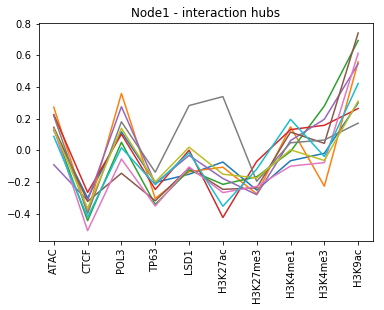

In [5]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - interaction hubs')

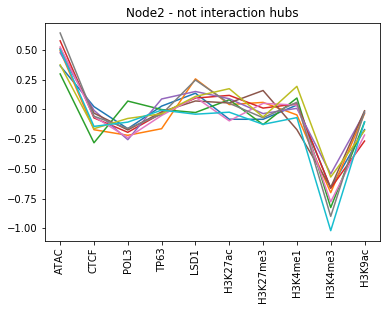

In [6]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - not interaction hubs')

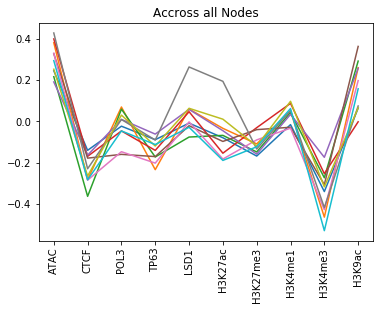

In [7]:
for i in range(10):
    # mean feature importance accross nodes
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

In [8]:
i=0
vmin = np.min(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
vmax = np.max(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=1))
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac']
x = [float(i+0.5) for i in range(np.shape(scores)[2])]

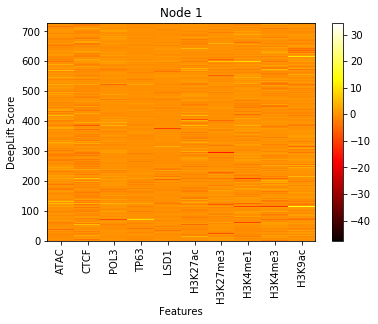

In [9]:
#plt.imshow(scores[:, 0, :, 0], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 0], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

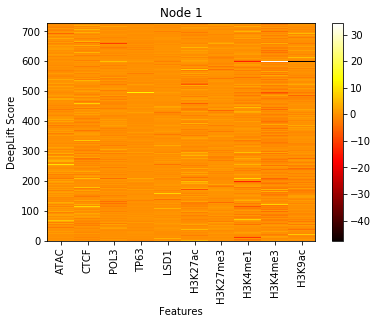

In [10]:
#plt.imshow(scores[:, 0, :, 1], cmap='hot', interpolation='nearest')
i=0
plt.pcolor(scores_from_10_iter[i][:, 0, :, 1], cmap='hot', vmin=vmin, vmax=vmax) # cmap='RdBu'
plt.xticks(x, features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('DeepLift Score')
plt.title('Node 1')
plt.colorbar()

# with genomic locations

In [11]:
scores_from_10_iter =[]
for i in range(10):
    dnn_normalized = LongRangeDNN(num_features=11, use_deep_CNN=True)
    validation_data = (X_valid_normalized[:, :, :11, :], y_valid)
    dnn_normalized.train(X_train_normalized[:, :, :11, :], y_train, validation_data)
    dnn_normalized.save(contacts+'dnn_CONV_w_dist', '/users/mtaranov/LongRange3D/')
    print "Iter",i, " summary:"
    print(dnn_normalized.test(X_test_normalized[:, :, :11, :], y_test))
    print(dnn_normalized.test(X_train_normalized[:, :, :11, :], y_train))
    print(dnn_normalized.test(X_valid_normalized[:, :, :11, :], y_valid))
    
    weights='/users/mtaranov/LongRange3D/weights/'+contacts+'dnn_CONV_w_dist.weights.h5'
    json_model='/users/mtaranov/LongRange3D/models/'+contacts+'dnn_CONV_w_dist.arch.json'
    scores = dnn_normalized.deeplift(X_valid_normalized[:, :, :11, :], weights, json_model, batch_size=128)
    scores_from_10_iter.append(scores)

Training model...
Train on 1152 samples, validate on 728 samples
Epoch 1/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.6945Epoch 0: validation loss: 0.682
Balanced Accuracy: 56.59%	 auROC: 0.632	 auPRC: 0.615	 auPRG: 0.274
Recall at 5%|10%|20% FDR: 0.0%|3.6%|4.9%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 4s - loss: 1.6778 - val_loss: 0.6818
Epoch 2/100
1000/1152 [=========================>....] - ETA: 0s - loss: 0.9157Epoch 1: validation loss: 0.634
Balanced Accuracy: 67.45%	 auROC: 0.719	 auPRC: 0.714	 auPRG: 0.450
Recall at 5%|10%|20% FDR: 0.3%|3.3%|42.0%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 4s - loss: 0.9115 - val_loss: 0.6341
Epoch 3/100
1000/1152 [=========================>....] - ETA: 0s - loss: 0.6506Epoch 2: validation loss: 0.627
Balanced Accuracy: 66.76%	 auROC: 0.740	 auPRC: 0.737	 auPRG: 0.493
Recall at 5%|10%|20% FDR: 0.8%|4.1%|47.5%	 Num Positives: 364	 Nu

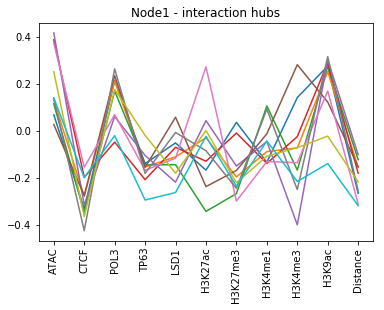

In [12]:
features = ['ATAC', 'CTCF', 'POL3', 'TP63', 'LSD1', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'Distance']
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 0], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node1 - interaction hubs')

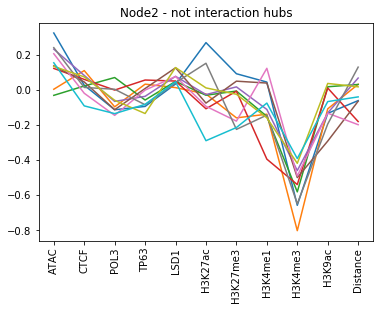

In [13]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(scores_from_10_iter[i][:, 0, :, 1], axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Node2 - not interaction hubs')

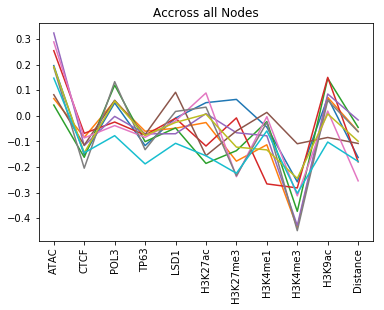

In [14]:
for i in range(10):
    # mean feature importance on node 1
    plt.plot(np.mean(np.concatenate((scores_from_10_iter[i][:, 0, :, 0], scores_from_10_iter[i][:, 0, :, 1]), axis=0), axis=0))
    x = [float(i) for i in range(np.shape(scores_from_10_iter[i])[2])]
    plt.xticks(x, features, rotation='vertical')
    plt.title('Accross all Nodes')

# with distance only

In [15]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)
validation_data = (X_valid_normalized[:, :, 10:, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, 10:, :], y_train, validation_data)

Training model...
Train on 1152 samples, validate on 728 samples
Epoch 1/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.4788Epoch 0: validation loss: 0.695
Balanced Accuracy: 49.86%	 auROC: 0.465	 auPRC: 0.463	 auPRG: -0.074
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 2s - loss: 1.4736 - val_loss: 0.6954
Epoch 2/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.4808Epoch 1: validation loss: 0.688
Balanced Accuracy: 55.77%	 auROC: 0.601	 auPRC: 0.577	 auPRG: 0.154
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 2s - loss: 1.4604 - val_loss: 0.6880
Epoch 3/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.4587Epoch 2: validation loss: 0.691
Balanced Accuracy: 53.98%	 auROC: 0.534	 auPRC: 0.530	 auPRG: 0.064
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 364	 Num

In [16]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))
print(dnn_normalized.test(X_train_normalized[:, :,  10:, :], y_train))

Balanced Accuracy: 56.99%	 auROC: 0.616	 auPRC: 0.578	 auPRG: 0.231
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 229	 Num Negatives: 229	 
Balanced Accuracy: 56.86%	 auROC: 0.611	 auPRC: 0.571	 auPRG: 0.228
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 576	 Num Negatives: 576	 


## with ATAC only

In [17]:
dnn_normalized = LongRangeDNN(num_features=1, use_deep_CNN=True)
validation_data = (X_valid_normalized[:, :, :1, :], y_valid)
dnn_normalized.train(X_train_normalized[:, :, :1, :], y_train, validation_data)

Training model...
Train on 1152 samples, validate on 728 samples
Epoch 1/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.5925Epoch 0: validation loss: 0.696
Balanced Accuracy: 50.14%	 auROC: 0.527	 auPRC: 0.563	 auPRG: -0.001
Recall at 5%|10%|20% FDR: 2.5%|2.5%|3.6%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 4s - loss: 1.5763 - val_loss: 0.6956
Epoch 2/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.3381Epoch 1: validation loss: 0.679
Balanced Accuracy: 54.67%	 auROC: 0.609	 auPRC: 0.651	 auPRG: 0.125
Recall at 5%|10%|20% FDR: 2.5%|17.9%|24.5%	 Num Positives: 364	 Num Negatives: 364	 

1152/1152 [==============================] - 4s - loss: 1.3372 - val_loss: 0.6786
Epoch 3/100
1000/1152 [=========================>....] - ETA: 0s - loss: 1.2210Epoch 2: validation loss: 0.673
Balanced Accuracy: 54.26%	 auROC: 0.632	 auPRC: 0.650	 auPRG: 0.213
Recall at 5%|10%|20% FDR: 1.6%|1.6%|25.3%	 Num Positives: 364	 

In [18]:
print(dnn_normalized.test(X_test_normalized[:, :,  10:, :], y_test))
print(dnn_normalized.test(X_train_normalized[:, :,  10:, :], y_train))

Balanced Accuracy: 56.99%	 auROC: 0.535	 auPRC: 0.480	 auPRG: 0.164
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 229	 Num Negatives: 229	 
Balanced Accuracy: 55.99%	 auROC: 0.527	 auPRC: 0.479	 auPRG: 0.138
Recall at 5%|10%|20% FDR: 0.0%|0.0%|0.0%	 Num Positives: 576	 Num Negatives: 576	 


# Print prediction

In [19]:
indx_train = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_train_thres_10.npy')
indx_valid = np.load('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_valid_thres_10.npy')
indx_test = np.load ('/users/mtaranov/NN_thres5max_datasets/dist_matched/indx_test_thres_10.npy')

In [20]:
labels_all=(np.concatenate((y_train, y_valid, y_test), axis=0)).astype(int)
preds_all=(np.concatenate((pred_probs_train, pred_probs_valid, pred_probs_test), axis=0))
indx_all=np.concatenate((indx_train, indx_valid, indx_test), axis=0)

labels_chr1 = labels_all[np.ravel(np.where(indx_all[:,2]==1))]
preds_chr1 = preds_all[np.ravel(np.where(indx_all[:,2]==1))]
indx_chr1 = indx_all[np.ravel(np.where(indx_all[:,2]==1))]

NameError: name 'pred_probs_train' is not defined

In [ ]:
NumberOfNodes=2272
preds_chr1_2d, labels_chr1_2d = get_2D(indx_chr1, preds_chr1, labels_chr1, NumberOfNodes)
# preds_test_2d, labels_test_2d = get_2D(indx_test, preds_test, labels_test, NumberOfNodes)

In [ ]:
# printMatrix(preds_chr1_2d, '', 1, 1, title='preds')
# printMatrix(labels_chr1_2d, '', 1, 1, title='Captures')

In [ ]:
zoomIn_window = (400,460)
NumberOfNodes=2272
plot_prediction(change_scale(preds_chr1_2d)+change_scale(preds_chr1_2d).T, change_scale(labels_chr1_2d)+change_scale(labels_chr1_2d).T, zoomIn_window, )